# Multiple Linear Regression

Multiple Linear Regression in ML is a model used to predict a continuous output variable based on the linear relationship between the output and multiple input variables. It assumes that the relationship between the dependent variable and each independent variable is linear.

## Steps in MLR

### Import all libraries

In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [351]:
import warnings
warnings.filterwarnings('ignore')  # This will suppress all warnings

### Load the data

In [353]:
data=pd.read_csv('data/advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### Data Preprocessing

In [355]:
data.describe

<bound method NDFrame.describe of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [356]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [357]:
data.shape

(200, 4)

In [358]:
data.size

800

In [359]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [360]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [361]:
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [362]:
data.duplicated().sum()

0

### Correlation Analysis

In [364]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


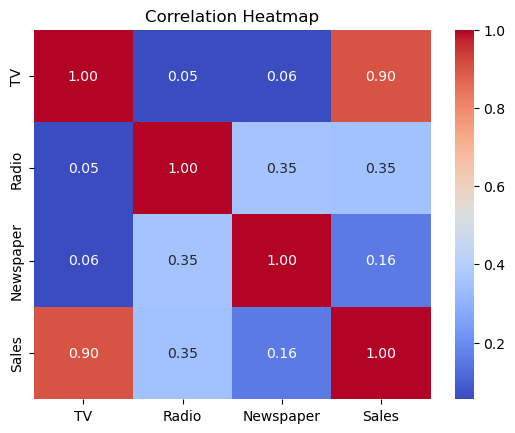

In [365]:
# correlation analysis using heatmap
correlation_matrix = data.corr()  # Compute correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Data Visualization

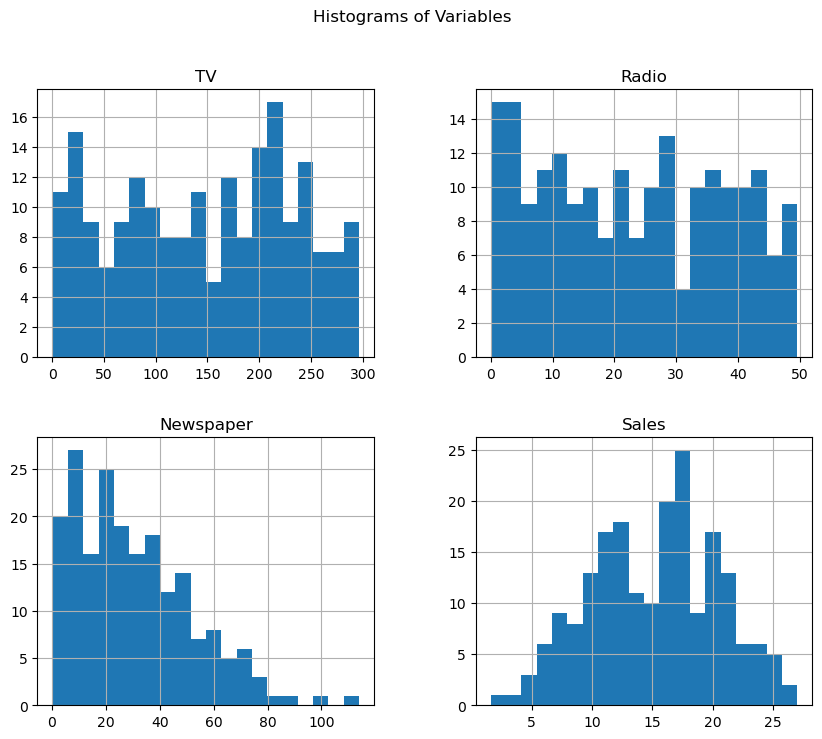

In [367]:
data.hist(figsize=(10, 8), bins=20)
plt.suptitle("Histograms of Variables")
plt.show()


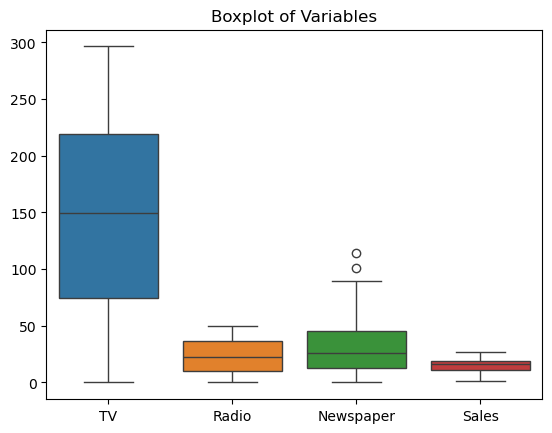

In [368]:
sns.boxplot(data=data)
plt.title("Boxplot of Variables")
plt.show()

In [ ]:
sns.pairplot(data)
plt.title("Pairplot of Variables")
plt.show()

In [ ]:
sns.boxplot(x='TV', data=data)
plt.title("Boxplot for TV")
plt.show()

sns.boxplot(x='Radio', data=data)
plt.title("Boxplot for Radio")
plt.show()


In [ ]:
sns.scatterplot(x='TV', y='Sales', data=data)
plt.title("Sales vs TV")
plt.show()

sns.scatterplot(x='Radio', y='Sales', data=data)
plt.title("Sales vs Radio")
plt.show()

sns.scatterplot(x='Newspaper', y='Sales', data=data)
plt.title("Sales vs Newspaper")
plt.show()


In [ ]:
sns.lmplot(x='TV', y='Sales', data=data)
plt.title('Sales vs TV with Regression Line')
plt.show()

In [ ]:
# Plot: Sales vs Radio with regression line
sns.lmplot(x='Radio', y='Sales', data=data)
plt.title('Sales vs Radio with Regression Line')
plt.show()


In [ ]:
# Plot: Sales vs Newspaper with regression line
sns.lmplot(x='Newspaper', y='Sales', data=data)
plt.title('Sales vs Newspaper with Regression Line')
plt.show()


In [ ]:
# Reshape the data to long format
df_long = pd.melt(data, id_vars=['Sales'], value_vars=['TV', 'Radio', 'Newspaper'], 
                  var_name='Media', value_name='Spending')
#all in one graph
sns.lmplot(x='Spending', y='Sales', data=df_long, hue='Media', markers=["o", "s", "D"])


### Spliting the Data into Multiple Inputs(X) & One Target(Y) variables

In [ ]:
X = data[['TV', 'Radio', 'Newspaper']]  
Y = data['Sales']  

In [ ]:
X.head()

In [ ]:
Y.head()

### Spliting data into test data & train data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

### Linear Regression Modeling

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
mlr=LinearRegression()

In [ ]:
mlr.fit(x_train,y_train)

### Predictions

In [ ]:
y_pred=mlr.predict(x_test)
y_pred

### Model Coefficients and Intercept

In [ ]:
print("Coefficient:",mlr.coef_) #m
print("Intercept:",mlr.intercept_) #C

### Visualization of Actual & Predicted Values

In [ ]:
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values', alpha=0.7)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Values', alpha=0.7)


In [ ]:
# Plotting actual values (y_test) with a line (blue)
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Values', linestyle='-', marker='o')

# Plotting predicted values (y_pred) with a line (red)
plt.plot(range(len(y_pred)), y_pred, color='red', label='Predicted Values', linestyle='--', marker='x')


### Performance Metrics for Regression Models: MAE, MSE, and RMSE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

### Creating DataFrame to view Results

In [ ]:
Results=pd.DataFrame(columns=['Actual_Sales','Predicted_Sales'])
Results['Actual_Sales']=y_test
Results['Predicted_Sales']=y_pred
Results=Results.reset_index()
Results['Id']=Results.index
Results.head()

### r2 value calculations

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2=r2_score(y_test,y_pred)
r2

### Conclusion

Based on the results from the Multiple Linear Regression (MLR) model, the 
𝑅
2
  value of 0.9071 indicates that approximately 90.71% of the variance in the dependent variable (Sales) can be explained by the independent variables used in the model. This is a strong indication that the model is well-fitting and has high predictive power.

The multiple linear regression model explains 90.71% of the variance in the sales data, which is a good result. However, the prediction errors indicate that there might be room for improvement, particularly for higher sales values

Overall, the model demonstrates a strong ability to predict sales based on the available features, with the 
𝑅
2
  value confirming its effectiveness. However, there may still be potential for further model refinement, such as through feature engineering, addressing any outliers, or trying more complex models, to reduce the small prediction errors seen in certain instances.

In [ ]:
# END